In [1]:
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Dense,Dropout ,Flatten , Conv2D , MaxPooling2D
import numpy as np


In [3]:
from tensorflow.keras.datasets import cifar10
(x_train , y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 70s 0us/step


In [4]:
print('Shape of training data ',x_train.shape)
print('Shape of testing data ',x_test.shape)
print('No. of Training samples ',x_train.shape[0])
print('No. of Testing samples ',x_test.shape[0])



Shape of training data  (50000, 32, 32, 3)
Shape of testing data  (10000, 32, 32, 3)
No. of Training samples  50000
No. of Testing samples  10000


In [5]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
x_train,x_test = x_train/255.0,x_test/255.0

In [7]:
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [8]:
arr = y_train[0]
print(arr)

[6]


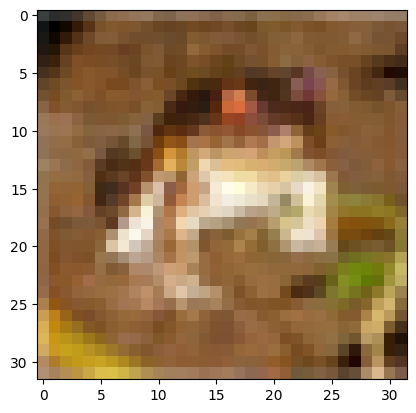

In [9]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])
plt.show()

In [10]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
plt.figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

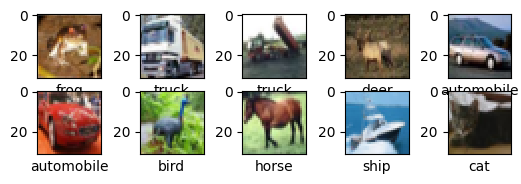

In [ ]:
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])

In [14]:
from tensorflow.keras import utils

In [15]:
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

In [16]:
model = Sequential(
    [
        Dense(64,input_shape=(32,32,3)),
        Conv2D(64,kernel_size=(3,3),activation='relu'),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(128,(3,3),activation='relu'),
        Conv2D(128,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.5),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
        
    ]
)

c:\Users\vasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'],)

In [18]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 60ms/step - accuracy: 0.3366 - loss: 1.7968 - val_accuracy: 0.5554 - val_loss: 1.2254
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.5804 - loss: 1.1613 - val_accuracy: 0.6657 - val_loss: 0.9376
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.6681 - loss: 0.9368 - val_accuracy: 0.7111 - val_loss: 0.8195
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.7156 - loss: 0.8088 - val_accuracy: 0.7327 - val_loss: 0.7810
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.7453 - loss: 0.7187 - val_accuracy: 0.7483 - val_loss: 0.7373
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.7662 - loss: 0.6620 - val_accuracy: 0.7648 - val_loss: 0.6866
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.7883 - loss: 0.5970 - val_accuracy: 0.7694 - val_loss: 0.6752
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.8057 -

In [19]:
val_loss , val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7795 - loss: 0.6549
0.6641033887863159 0.7814000248908997


In [20]:
arr = model.predict([x_train[0].reshape(1,32,32,3)])
print(arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[4.0294854e-06 2.7920229e-05 4.3139257e-03 1.0736348e-01 6.4517036e-03
  3.7258556e-01 4.9274927e-01 1.6483812e-02 6.6575276e-06 1.3642810e-05]]


c:\Users\vasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 32, 32, 3))',)
  warnings.warn(msg)


In [21]:
label = np.argmax(arr)
print(label)

6
